<a href="https://colab.research.google.com/github/DOLARIK/Machine-Learning-Projects/blob/master/Properties_from_Face_Detection_30_11_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing the Training Dataset for Face Classification based on 'Race'**

## Install Dependencies

In [8]:
!pip install PyDrive

In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## Authorize Google SDK

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

##Obtaining File-ID and Transferring Contents

In [0]:
download = drive.CreateFile({'id': '1Ckp9o4bWcBuUCUPh9Q7SV9r3xYa0gmcV'})
download.GetContentFile('Race.tar')

###Uploading Files to Google Drive if Needed

In [0]:
upload = drive.CreateFile({'title': 'RACE.txt'})
upload.SetContentFile('Race.tar')
upload.Upload()

#**Training Model**

##Installing Dependencies

In [13]:
!pip install keras

In [14]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Activation, Flatten
import numpy as np

Using TensorFlow backend.


##Model Building

###Employing VGG

In [15]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 17s 0us/step


In [0]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
  model.add(layer)
  

In [0]:
for layer in model.layers:
  layer.trainable = False

In [0]:
model.add(Dense(5, activation = 'softmax'))

In [109]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       295168    
__________

##Data Extraction and Visualization

In [0]:
import re
from IPython.display import Image
import urllib

Extraction

In [0]:
!tar -x -f Race.tar

In [0]:
import cv2
import matplotlib.pyplot as plt

In [73]:
white = []
for image in os.listdir('Race/0/'):
  img = cv2.imread(os.path.join('/content/Race/0/',image), cv2.IMREAD_GRAYSCALE)
  if img is not None:
    white.append(img)

print(len(white))

10078


In [43]:
black = []
for image in os.listdir('Race/1/'):
  img = cv2.imread(os.path.join('/content/Race/1/',image), cv2.IMREAD_GRAYSCALE)
  if img is not None:
    black.append(img)
    
print(len(black))

4528


In [44]:
asian = []
for image in os.listdir('Race/2/'):
  img = cv2.imread(os.path.join('/content/Race/2/',image), cv2.IMREAD_GRAYSCALE)
  if img is not None:
    asian.append(img)
    
print(len(asian))

3434


In [45]:
indian = []
for image in os.listdir('Race/3/'):
  img = cv2.imread(os.path.join('/content/Race/3/',image), cv2.IMREAD_GRAYSCALE)
  if img is not None:
    indian.append(img)
    
print(len(indian))

3976


In [46]:
other = []
for image in os.listdir('Race/4/'):
  img = cv2.imread(os.path.join('/content/Race/4/',image), cv2.IMREAD_GRAYSCALE)
  if img is not None:
    other.append(img)
    
print(len(other))

1692


As we can see that the data doesn't look very balanced, we're gonna have to do something about it. 

But let's try without bothering about it too much and see how the results turn out to be. 

Visualization

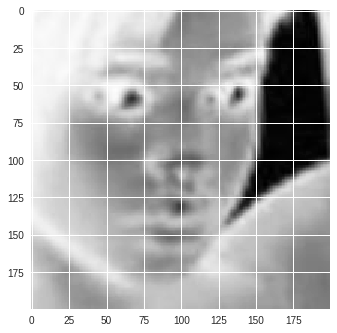

In [50]:
plt.imshow(black[1])

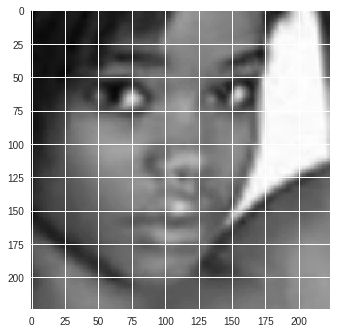

In [51]:
new = cv2.resize(black[1],(224,224))
plt.imshow(new, cmap = 'gray')

##Building Training Set

In [0]:
train = []

data_dir = '/content/Race/'
categories = ['0','1','2','3','4']

for category in categories:
  
  loc = os.path.join(data_dir,category)
  class_num = categories.index(category)
  
  for img in os.listdir(loc):
    
    im_array = cv2.imread(os.path.join(loc,img))#,cv2.IMREAD_GRAYSCALE)
    resized_array = cv2.resize(im_array, (224,224))
    
    train.append([resized_array, class_num])


In [131]:
print(train)
train[0][0].shape

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(224, 224, 3)

Shuffling our Training Set

In [0]:
import random

random.shuffle(train)

Now we'll be creating the feature and label set for its proper digestion by training model. 

In [144]:
Race_X = []
Race_y = []

for features, labels in train:
  
  Race_X.append(features)
  Race_y.append(labels)
  
Race_X[0].shape

(224, 224, 3)

In [0]:
Race_X = np.array(Race_X).reshape(-1, 224, 224, 3) # We have to do this to feed our Keras model.

In [143]:
1189572608/(224*224*1)

23708.0

In [140]:
Race_X[0].shape

(224, 224, 1)

Now storing the processed data onto the colab drive.

In [0]:
import pickle

pickle_out = open('Race_features.pickle','wb')
pickle.dump(Race_X,pickle_out)
pickle_out.close()

pickle_out = open('Race_labels.pickle','wb')
pickle.dump(Race_y,pickle_out)
pickle_out.close()

In [0]:
!ls

In [0]:
pickle_in = open('Race_features.pickle','rb')
Race_X = pickle.load(pickle_in)

pickle_in = open('Race_labels.pickle','rb')
Race_y = pickle.load(pickle_in)


In [0]:
Race_X[0].shape


##Model Training 

###Using Pretrained VGG16

As we have already built our model we are left with training it.

In [114]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])
model.fit(Race_X, Race_y, epochs = 10, batch_size = 1, validation_split = .1)

ValueError: ignored